# [***GalScal***](https://github.com/TYLERSFOSTER/GalScal) demo notebook

## Introduction
This notebook provides a demo of the package `galscal`.


[*GalScal*](https://github.com/TYLERSFOSTER/GalScal) is a Python package that lets users work with audio signals that come equipped with natural actions by Galois groups of number fields. The primitive audio signal objects in this setting are pure oscillators of the form
$$
F(t)
\ \ =\ \ 
A_{0}\ e^{\omega\ \!r_{0}\ \!t}
$$
for fixed *absolute amplitude* $A_0\in\mathbb{R}_{\ge 0}$, fixed *absolute_rate* $r_{0}\in\mathbb{R}$, and fixed *complex frequency* $\omega\in\mathbb{C}$. Here $t$ is our time parameter, measured in seconds. 

### Galois actions on certain pure oscillators
Because any complex number decomposes as a linear cobination of its real and imagingary parts, we can write $\omega$ as
$$
\omega
\ \ =\ \ 
\text{log}_{\ }a\ +\ i\ \!2\pi\ \!\lambda
$$
for $a\in\mathbb{R}_{>0}$ and $\lambda in \mathbb{R}$. Thus our signal $F(t)=A_{0}\ e^{\omega\ \!r_{0}\ \!t}$ can be re-written in the form
$$
F(t)
\ \ =\ \ 
A_0\ \!a\ \!e^{i\ \!2\pi\ \!\lambda\ \!r_0 t}.
$$
This is nothing but a [*pure oscillator*](https://en.wikipedia.org/wiki/Electronic_oscillator) with amplitude $A_{0}\ a$ and with frequency $\lambda\ \!r_{0}\ \text{Hz}$.

The utility in writing this signal as $F(t)=A_{0}e^{\omega\ \!r_{0}\ \!t}$, is that when $A_{0}$ and $r_{0}$ are fixed at the outset, this signal takes its complete determination from a single complex number $\omega$. If $K/\mathbb{Q}$ is a number field with automorphism group $\text{Aut}(K/\mathbb{Q})$, if our complex number $\omega$ arises as an element in $K$, and if $\varphi\ \in\ \text{Aut}(K/\mathbb{Q})$ is a particular automorphism of our field $K$, then we obtained a new pure oscilator as
$$
\varphi_{\ast}F(t)
\ \ = \ \ 
A_{0}\ e^{\varphi(\omega)\ \!r_{0}\ \!t}.
$$
In this way, we obtained systems of pure oscillators that come equipped with natural Galois actions.

### Galois movement in algebraic musical scales
The oscillators $F(t)=A_{0}\ e^{\omega\ \!r_{0}\ \!t}$ fit naturally into justly-intoned *scales-with-amplification*. A *scale-with-amplification* is any scale where entries in the scale come not only assigned pitches, but with assigned amplitudes as well. 

*GalScal* provides Galois-induced movement within various scales-with-amplification that arises naturally from the arithemtic of the rational numebrs $\mathbb{Q}$.

## Getting started
Before using *GalScal*, install and import the Python packages that *GalScal* depends on, and import *GalScal* itself as follows:

### Install packages (if absent)
*GalScal* requires the packages Numpy and SciPiy. The present notebook also makes use of the packages MatPlotLib abd IPython.

In [ ]:
!pip3 install numpy
!pip3 install scipy
!pip3 install matplotlib
!pip3 install IPython

### Import packages
Import the packages used by *GalScal* and by the present notebook.

In [1]:
import os
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from IPython.display import Audio

Import *GalScal*.

In [2]:
import sys
sys.path.append("src")
import galscal

## Using *GalScal*

### The "stationary" signal class `galscal.Signal`
[...]

In [3]:
PITCH_IN_HZ = 6.
omega = complex(0., 2 * np.pi * PITCH_IN_HZ)

print("Our complex frequency \u03C9:", omega)

Our complex frequency ω: 37.69911184307752j


In [4]:
SAVE_PATH = 'example_signal'
TIME_INTERVAL = (2., 3.)

example_signal = galscal.Signal(omega)
print("Example GalScal `Signal` object:\n", example_signal, '\n')

example_signal.save_wav(SAVE_PATH, TIME_INTERVAL)

Example GalScal `Signal` object:

Signal over time interval [2.0, 3.0] saved in following location:
'/Users/foster/Desktop/Music_Work/Galois_actions/galscal/example_signal.wav'


Signal sample rate: 44100


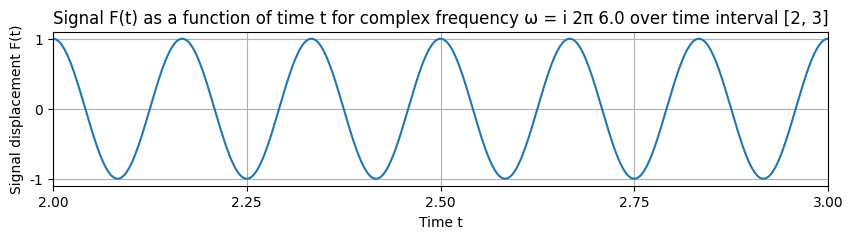

In [5]:
sample_rate, saved_wav = wavfile.read(SAVE_PATH)
print("Signal sample rate:", sample_rate)

normalized_wav = saved_wav / np.iinfo(np.int16).max
sampled_time = np.linspace(TIME_INTERVAL[0], TIME_INTERVAL[1], num=saved_wav.shape[0])

plt.figure(figsize=(10, 2))
plt.plot(sampled_time, normalized_wav)
plt.title('Signal F(t) as a function of time t for complex frequency \u03C9 = i 2\u03C0 ' + str(PITCH_IN_HZ) + ' over time interval [2, 3]')
plt.xlabel('Time t')
plt.ylabel('Signal displacement F(t)')
plt.yticks(ticks=[-1, 0, 1], labels=['-1', '0', '1'])
plt.xlim([TIME_INTERVAL[0], TIME_INTERVAL[1]])
plt.xticks(np.linspace(TIME_INTERVAL[0], TIME_INTERVAL[1], 5))
plt.grid(True)
plt.show()

os.remove(SAVE_PATH)


In [6]:
SAVE_PATH = 'example_signal'
NEW_PITCH_IN_HZ = 440.
new_omega = complex(0., 2 * np.pi * NEW_PITCH_IN_HZ)

new_example_signal = galscal.Signal(new_omega)
new_example_signal.save_wav(SAVE_PATH, TIME_INTERVAL)
print("Our new complex frequency \u03C9:", new_omega)

sample_rate, saved_wav = wavfile.read(SAVE_PATH)
print("Signal sample rate:", sample_rate)

# Normalize the data if it's not already in float format
if saved_wav.dtype == np.int16:
    data = saved_wav / np.iinfo(np.int16).max
elif saved_wav.dtype == np.int32:
    data = saved_wav / np.iinfo(np.int32).max

# Display an audio widget to play sound
Audio(data, rate=sample_rate)

Signal over time interval [2.0, 3.0] saved in following location:
'/Users/foster/Desktop/Music_Work/Galois_actions/galscal/example_signal.wav'
Our new complex frequency ω: 2764.601535159018j
Signal sample rate: 44100


### The "dynamic" signal class `galscal.GalSignal`
[...]